# Ranking Distribution and SRCC

In [1]:
# import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import *
import datetime
%load_ext autoreload
%autoreload 2

## optimizer

### Ranking Distribution in ml-1m

group len: 3, shape: (31,)
data len: 31, shape: (3,)
opt_srcc: 0.3097


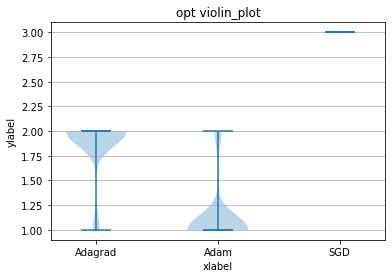

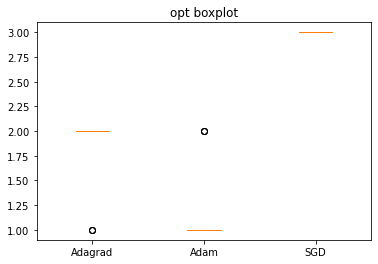

In [2]:
import json 
from utils import violin_plot
optgroups = np.array([[],[],[]],dtype='int32')
load_dict_list = []
for num in [20,21,22,23,24,25]:
     with open("opt_random/optinfo" + str(num) + ".json",'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          optgroups = np.concatenate((optgroups , group_tmp ), axis=1)
# load_dict = load_dict1.copy()

print("group len: {}, shape: {}".format(len(optgroups), optgroups[0].shape))
# print("group len: {}, shape: {}\ngroups: {}".format(len(groups), groups[0].shape, groups))
optranks = get_rank_from_score(optgroups)
opt_srcc = get_srcc_from_rank(groups=optgroups, ranks=optranks, optslist=['Adagrad', 'Adam', 'SGD'])
print("opt_srcc: {:.4}".format(opt_srcc))
violin_plot(groups=optgroups, xlabel=['Adagrad', 'Adam', 'SGD'], figtitle='opt ')

## learning rate

### Ranking Distribution in ml-1m

group len: 9, shape: (110,)
data len: 110, shape: (9,)
ranks.shape: (110, 9)
lrsrcc: 0.5521


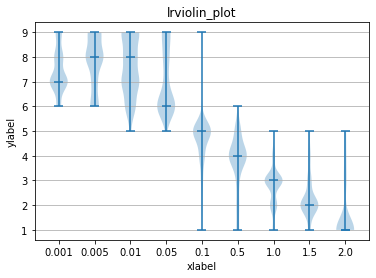

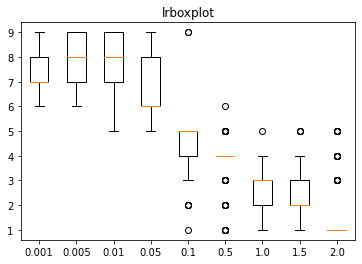

In [3]:
import json 
from utils import violin_plot
lrgroups = np.array([[],[],[],[],[],[],[],[],[]],dtype='int32')
load_dict_list = []
for num in [12,14,15,16,17,19,20,21]:
     with open("lr_random/lrinfo" + str(num) + ".json",'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          lrgroups = np.concatenate((lrgroups , group_tmp), axis=1)
# load_dict = load_dict1.copy()

print("group len: {}, shape: {}".format(len(lrgroups), lrgroups[0].shape))
lrranks = get_rank_from_score(lrgroups)
print("ranks.shape: {}".format(lrranks.shape))
lr_srcc = get_srcc_from_rank(groups=lrgroups, ranks=lrranks, optslist=['0.001','0.005', '0.01','0.05', '0.1', '0.5', '1.0','1.5','2.0'])
print("lrsrcc: {:.4}".format(lr_srcc))
# print("group len: {}, shape: {}\ngroups: {}".format(len(groups), groups[0].shape, groups))
violin_plot(groups=lrgroups, xlabel=['0.001','0.005', '0.01','0.05', '0.1', '0.5', '1.0','1.5','2.0'], figtitle='lr')


## embedding size

### Ranking Distribution in ml-1m embs

group len: 7, shape: (97,)
data len: 97, shape: (7,)
ranks.shape: (97, 7)
embsrcc: 0.6783702340552387


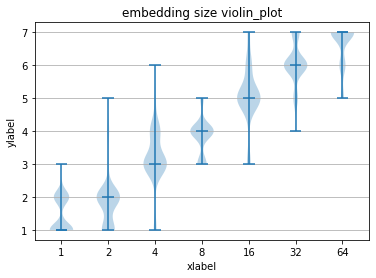

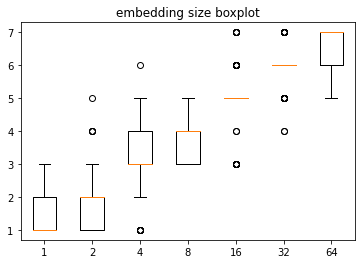

In [4]:
import json 
from utils import violin_plot
embgroups = np.array([[],[],[],[],[],[],[]],dtype='int32')
load_dict_list = []
for num in [12,15,17,18,19,20,21,22,23,30,31,32,33,34,35,36,37,38,39]:
     with open("emb_random/embinfo" + str(num) + ".json",'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          embgroups = np.concatenate((embgroups , group_tmp), axis=1)
# load_dict = load_dict1.copy()

print("group len: {}, shape: {}".format(len(embgroups), embgroups[0].shape))
embranks = get_rank_from_score(embgroups)
print("ranks.shape: {}".format(embranks.shape))
emb_srcc = get_srcc_from_rank(groups=embgroups, ranks=embranks, optslist=['1','2', '4','8','16','32','64'])
print("embsrcc: {}".format(emb_srcc))
# print("group len: {}, shape: {}\ngroups: {}".format(len(groups), groups[0].shape, groups))
violin_plot(groups=embgroups, xlabel=['1','2', '4','8','16','32','64'], figtitle='embedding size ')

## weight decay

group len: 5, shape: (46,)
data len: 46, shape: (5,)
ranks.shape: (46, 5)
wd_srcc: 1.0


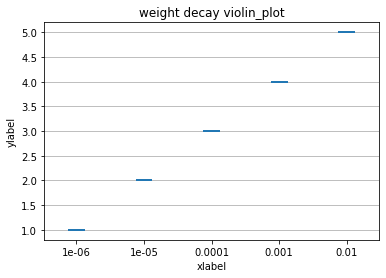

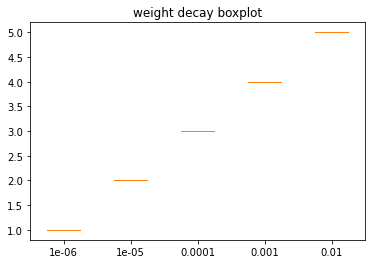

In [5]:
import json 
import numpy as np
from utils import *
wdgroups = np.array([[],[],[],[],[]],dtype='float')
load_dict_list = []
for num in [1,2,3,5,6,7]:
     with open("weight_random/weighdeinfo" + str(num) + ".json",'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          wdgroups = np.concatenate((wdgroups , group_tmp), axis=1)
# load_dict = load_dict1.copy()

print("group len: {}, shape: {}".format(len(wdgroups), wdgroups[0].shape))
wdranks = get_rank_from_score(wdgroups)
print("ranks.shape: {}".format(wdranks.shape))
wd_srcc = get_srcc_from_rank(groups=wdgroups, ranks=wdranks, optslist=['1e-06','1e-05', '0.0001','0.001','0.01'])
print("wd_srcc: {}".format(wd_srcc))
# print("group len: {}, shape: {}\ngroups: {}".format(len(groups), groups[0].shape, groups))
violin_plot(groups=wdgroups, xlabel=['1e-06','1e-05', '0.0001','0.001','0.01'], figtitle='weight decay ')

## SRCC show bar plot

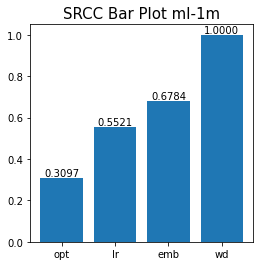

In [6]:
# 虚拟数据
x = ["opt", "lr", "emb", "wd"]
y = [opt_srcc, lr_srcc, emb_srcc, wd_srcc]

# 方式2（推荐）
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(x=x, height=y)
ax.set_title("SRCC Bar Plot ml-1m", fontsize=15)
for a,b in zip(x, y):
    plt.text(a,b, '%.4f'%b, ha='center',  va='bottom', )


## Others

In [7]:
tmpfilename1='MLP_ml-100k_32_Adagrad0.001_explicit_1e-05_1_2022-02-21-11:56:50.txt'
fp_item_dict1 = get_item_from_filename(tmpfilename1)
print("fp_item_dict: {}".format(fp_item_dict1))
# epoch_list,bprloss_list,recall20_list = get_loss_recall(filename=tmpfilename)
# recall20_list
dateTime_1 = datetime.datetime.strptime(fp_item_dict1['time'],'%Y-%m-%d-%H:%M:%S')
print(dateTime_1) 

tmpfilename2='MLP_ml-100k_64_Adam1.5_implicit_1e-05_1_2022-02-01-18:13:35.txt'
fp_item_dict2 = get_item_from_filename(tmpfilename2)
print("fp_item_dict: {}".format(fp_item_dict2))
# epoch_list,bprloss_list,recall20_list = get_loss_recall(filename=tmpfilename)
# recall20_list
dateTime_2 = datetime.datetime.strptime(fp_item_dict2['time'],'%Y-%m-%d-%H:%M:%S')
print(dateTime_2) 

dateTime_1 < dateTime_2

fp_item_dict: {'mode': 'MLP', 'dataset': 'ml-100k', 'embedding_dim': 32, 'opt': 'Adagrad', 'lr': 0.001, 'data_type': 'explicit', 'weight_decay': 1e-05, 'seed': 1, 'time': '2022-02-21-11:56:50'}
2022-02-21 11:56:50
fp_item_dict: {'mode': 'MLP', 'dataset': 'ml-100k', 'embedding_dim': 64, 'opt': 'Adam', 'lr': 1.5, 'data_type': 'implicit', 'weight_decay': 1e-05, 'seed': 1, 'time': '2022-02-01-18:13:35'}
2022-02-01 18:13:35


False

In [8]:
# %%bash
anchor_config_num = 20
print(np.random.uniform(low=0.0, high=1.0, size=anchor_config_num)) 
# os.system('python ./main.py  --mode GMF --dataset ml-100k --use_gpu 1 --gpu 7 --device 7 --opt Adagrad    --data_type implicit')
# echo anchor_config_num
# os.system('echo {}'.format(anchor_config_num))
# os.system('echo 123132')
# print(np.random.choice(range(1, 5, 1), anchor_config_num))
lr_list = np.random.uniform(low=1e-2, high=2.0, size=anchor_config_num)
print('lr_list[1]: {:.3f}'.format(lr_list[1]))

[0.86605932 0.07394048 0.33743089 0.96968468 0.3803458  0.56491183
 0.83599761 0.67778402 0.73521846 0.68706071 0.22492831 0.91007791
 0.69008208 0.94260419 0.80439382 0.53016368 0.72950052 0.91124068
 0.95510859 0.5959395 ]
lr_list[1]: 1.452


In [9]:
filePath = './save/log'
filePath_list = []
for i,j,k in os.walk(filePath):
    # print(i)
    # print(j)
    # print(k)
    filePath_list = k

cnt = 0
filenum = 2
for fp in filePath_list:
    # tmpfilename='GMF_ml-1m_2_Adagrad0.05_1e-05_1_2022-01-29-00:29:08.txt'
    cnt += 1
    fp_item_dict = get_item_from_filename(fp)
    # print(fp_item_dict)
    if cnt < filenum and fp_item_dict['mode'] == 'GMF' and fp_item_dict['data_type'] == 'implicit': 
        epoch_list,bprloss_list,recall20_list = get_loss_recall(filename=fp,train_epochs=2000, savedir='save')
        plot_loss_recall(epoch_list,bprloss_list,recall20_list, subtitle='test')

# tmpfilename='GMF_ml-1m_2_Adagrad0.05_1e-05_1_2022-01-29-00:29:08.txt'
# tmpfilename[:-4]

logfilePath = './random_mode/'  
if not os.path.exists(logfilePath):
    os.makedirs(logfilePath)

filePath_list = []
for i,j,k in os.walk(logfilePath + 'log'):
    filePath_list = k 

# filePath_list[1].startswith('GMF' + '_' + 'ml-100k' + '_')	


group len: 3, shape: (10000,)
data len: 10000, shape: (3,)


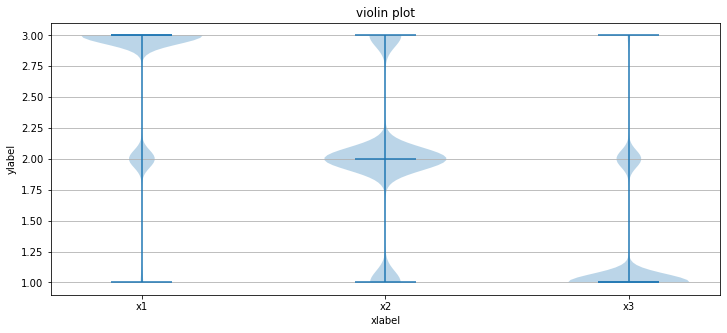

In [10]:
fig, axes = plt.subplots(figsize=(12, 5))
f = [1,2,3]
sample_size = 10000
meangap = 4
groups = np.array([np.random.normal(mean, 3, sample_size) for mean in range(6, 6+3*meangap, meangap)])
# groups.shape
# print(groups[:,:3])
# 排序方法
print("group len: {}, shape: {}".format(len(groups), groups[0].shape))

all_data = np.zeros((sample_size, 3), dtype=np.int32)
for i in range(sample_size):
    all_data[i,:] = np.argsort(-groups[:,i]) + 1

print("data len: {}, shape: {}".format(len(all_data), all_data[0].shape))

# print(all_data[:,:3])
axes.violinplot(all_data,
                   showmeans=False,
                   showmedians=True
                   )
axes.set_title('violin plot')

# # adding horizontal grid lines

axes.yaxis.grid(True)
axes.set_xticks([y + 1 for y in range(len(all_data.T))], )
axes.set_xlabel('xlabel')
axes.set_ylabel('ylabel')

plt.setp(axes, xticks=[y + 1 for y in range(len(all_data.T))],
         xticklabels=['x1', 'x2', 'x3']
         )

plt.show()

In [11]:
from utils import get_loss_recall
# filenametmp = 'GMF'+'_'+'ml-100k' + '_' + str(embedding_dim_list[i]) \
                    # +  '_'+str(opt) + str(lr_list[i]) 
filenametmp = 'GMF'+'_'+'ml-100k' + '_' + str(52) \
                    +  '_Adam'+ ( '%.4f'%(1.1206) )
print(filenametmp)     
logfilePath = './random_mode/'  
if not os.path.exists(logfilePath):
    os.makedirs(logfilePath)             
filePath_list = []
for ii,jj,kk in os.walk(logfilePath + 'log'):
    filePath_list = kk       

# get rank and save 

for fp in filePath_list:
    # print('fp: {}'.format(fp))
    if fp.startswith(filenametmp):
        print('debug1')
        epoch_list,bprloss_list,recall20_list = get_loss_recall(filename=fp,train_epochs=2000,savedir='random_mode')
        recall20_array = np.array(recall20_list)
        max_epoch  = np.argmax(recall20_array)
        max_recall = np.max(recall20_array)
        # optresult_list_dict[opt].append(max_recall)
        print("fp: {}, max_recall: {}".format(fp, max_recall))

GMF_ml-100k_52_Adam1.1206


In [12]:
import json
# 创建字典
info_dict = {'name': 'Joe', 'age': 20, 'job': 'driver'}
# dumps 将数据转换成字符串
info_json = json.dumps(info_dict,sort_keys=False, indent=4, separators=(',', ': '))
# 显示数据类型
print(type(info_json))
f = open('info.json', 'w')
f.write(info_json)

<class 'str'>


57